In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure

## Завдання 1

In [2]:
x = [0.77, 1.14, 1.57, 2.35, 3.09, 3.58, 3.8]
y = [13.01, 9.11, 5.75, 3.66, 6.17, 9.33, 12.67]
task1_data = pd.DataFrame({'X' : x, 'Y': y})
task1_data = task1_data.set_index('X')
task1_data

,Y
X,
0.77,13.01
1.14,9.11
1.57,5.75
2.35,3.66
3.09,6.17
3.58,9.33
3.80,12.67


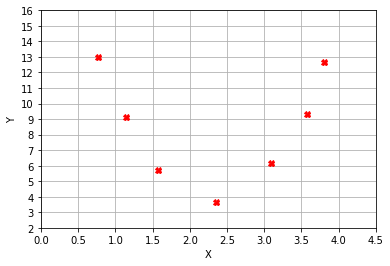

In [3]:
plt.plot(task1_data, 'rX')
# plt.plot(task1_data, 'b')
# plt.axis([2, 0.1, 0.2, 15])
plt.xticks(np.arange(0, 5, 0.5))
plt.yticks(np.arange(2, 17, 1))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
# plt.legend()
# plt.show()
plt.savefig('./pictures/task1_data_2.jpg', dpi=300)

In [4]:
F_1 = np.array([[1 for i in range(0, 7)], x, [i**2 for i in x]]).transpose()
F_1

array([[ 1.    ,  0.77  ,  0.5929],
       [ 1.    ,  1.14  ,  1.2996],
       [ 1.    ,  1.57  ,  2.4649],
       [ 1.    ,  2.35  ,  5.5225],
       [ 1.    ,  3.09  ,  9.5481],
       [ 1.    ,  3.58  , 12.8164],
       [ 1.    ,  3.8   , 14.44  ]])

In [5]:
A_1 = F_1.transpose() @ F_1
A_1

array([[  7.       ,  16.3      ,  46.6844   ],
       [ 16.3      ,  46.6844   , 149.044186 ],
       [ 46.6844   , 149.044186 , 502.5541514]])

In [6]:
A_1_inv = np.linalg.inv(A_1)
A_1_inv

array([[ 4.24536919, -4.1988219 ,  0.85088836],
       [-4.1988219 ,  4.5557084 , -0.96105538],
       [ 0.85088836, -0.96105538,  0.20797063]])

In [7]:
mu_1_vals = task1_data['Y'].to_numpy()
mu_1_vals.shape = (-1, 1)
mu_1_vals

array([[13.01],
       [ 9.11],
       [ 5.75],
       [ 3.66],
       [ 6.17],
       [ 9.33],
       [12.67]])

In [8]:
beta_1_estim = A_1_inv @ F_1.transpose() @ mu_1_vals
beta_1_estim

array([[ 24.74961129],
       [-18.25186484],
       [  3.94046229]])

In [9]:
lin_model1 = lambda p1,p2,p3,x: p1 + p2 *x + p3 * x**2

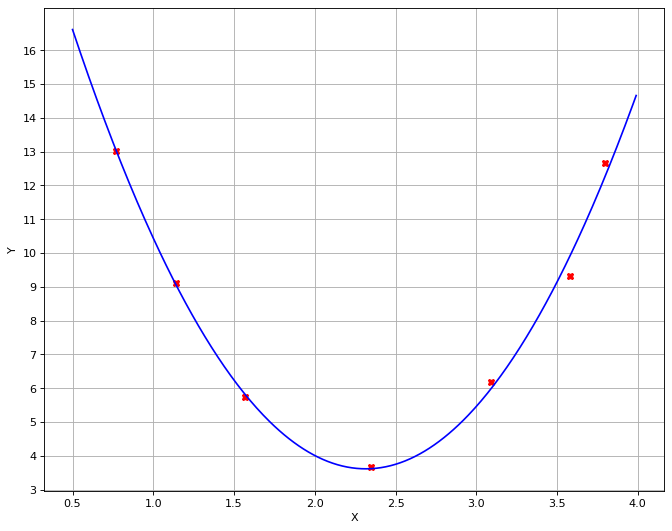

In [10]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(task1_data, 'rX')
# plt.plot(task1_data, 'b')
# plt.axis([2, 0.1, 0.2, 15])
plt.xticks(np.arange(0, 5, 0.5))
plt.yticks(np.arange(2, 17, 1))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
# plt.legend()
plt.plot(np.arange(0.5, 4, 0.01), lin_model1( 24.74961129, -18.25186484, 3.94046229, np.arange(0.5, 4, 0.01)), 'b')
# plt.show()

plt.savefig('./pictures/task1_polynomial_regr.jpg', dpi=300)

In [11]:
n = 7
m = 3

In [12]:
sigma_1 = (1/(n-m)) * np.linalg.norm(mu_1_vals - F_1 @ beta_1_estim)**2
sigma_1

0.131183052708195

In [13]:
D_1 = (n/(n-1))*mu_1_vals.var()
D_1

12.533547619047617

In [14]:
np.sum((mu_1_vals - F_1 @ beta_1_estim)**2)

0.52473221083278

In [15]:
np.linalg.norm(mu_1_vals - F_1 @ beta_1_estim)**2

0.52473221083278

In [16]:
np.sum((mu_1_vals - mu_1_vals.mean())**2) 

75.2012857142857

In [17]:
mu_1_vals.var()*n

75.2012857142857

In [18]:
gamma_adeq_1 =D_1/ sigma_1
gamma_adeq_1

95.54242991224923

In [19]:
beta_1_estim[2, 0]

3.940462292776324

In [20]:
gamma_rel_1 = beta_1_estim[2, 0] / (np.sqrt(sigma_1 * A_1_inv[2, 2]))
gamma_rel_1

23.856531730863363

In [21]:
regres_t1 = lambda x: beta_1_estim[0, 0] + beta_1_estim[1, 0] * x + beta_1_estim[2, 0] * x**2

In [22]:
x_1 = 2
x_vec_1 = np.array([[1],[10],[10**2]])
t_1 = 2.776
left_mean_1 = regres_t1(x_1) - t_1*np.sqrt(sigma_1 * (x_vec_1.transpose() @ A_1_inv @ x_vec_1)[0,0])
right_mean_1 = regres_t1(x_1) + t_1*np.sqrt(sigma_1 * (x_vec_1.transpose() @ A_1_inv @ x_vec_1)[0,0])
(round(left_mean_1,5), round(right_mean_1,5))

(-22.66241, 30.67787)

In [23]:
left_val_1 = regres_t1(x_1) - t_1*np.sqrt(sigma_1 * (1 + x_vec_1.transpose() @ A_1_inv @ x_vec_1)[0,0])
right_val_1 = regres_t1(x_1) + t_1*np.sqrt(sigma_1 * (1 + x_vec_1.transpose() @ A_1_inv @ x_vec_1)[0,0])
(round(left_val_1,5), round(right_val_1,5))

(-22.68135, 30.69681)

## Завдання 2

In [24]:
task2_data = pd.DataFrame({'X1': [2, 2, 2, 7, 7, 3, 3, 4, 4, 3, 8,8,1,1,6],
                           'X2': [1,1,1,7,7,3,3,2,2,4,9,9,1,1,3],
                           'Y': [600,800,700,1300,1100,700,650,600,750,1000,800,1200,700,400,900]})
task2_data

,X1,X2,Y
0,2,1,600
1,2,1,800
2,2,1,700
3,7,7,1300
4,7,7,1100
5,3,3,700
6,3,3,650
7,4,2,600
8,4,2,750
9,3,4,1000


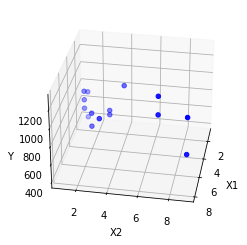

In [25]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(task2_data['X1'].to_numpy(), task2_data['X2'].to_numpy(), task2_data['Y'].to_numpy(), c="b")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.view_init(elev=30, azim = 10)
# ax.set_xticks([0, 2, 4, 6, 8, 10])
# ax.set_yticks([-10, -5, 0, 5, 10])
# ax.set_zticks([-4, -2, 0, 2, 4, 6, 8, 10])
plt.show()
fig.savefig('./pictures/task2_data.png', dpi=300)

In [26]:
F_2 = np.vstack([np.ones(15), task2_data['X1'].to_numpy(),
                 task2_data['X2'].to_numpy()]).transpose()
F_2

array([[1., 2., 1.],
       [1., 2., 1.],
       [1., 2., 1.],
       [1., 7., 7.],
       [1., 7., 7.],
       [1., 3., 3.],
       [1., 3., 3.],
       [1., 4., 2.],
       [1., 4., 2.],
       [1., 3., 4.],
       [1., 8., 9.],
       [1., 8., 9.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 6., 3.]])

In [27]:
for i in F_2.T:
    for j in i:
        print(int(j), " & ", end = ' ')
    print('\\\\')

1  &  1  &  1  &  1  &  1  &  1  &  1  &  1  &  1  &  1  &  1  &  1  &  1  &  1  &  1  &  \\
2  &  2  &  2  &  7  &  7  &  3  &  3  &  4  &  4  &  3  &  8  &  8  &  1  &  1  &  6  &  \\
1  &  1  &  1  &  7  &  7  &  3  &  3  &  2  &  2  &  4  &  9  &  9  &  1  &  1  &  3  &  \\


In [28]:
len(F_2)

15

In [29]:
A_2 = F_2.transpose() @ F_2
A_2


array([[ 15.,  61.,  54.],
       [ 61., 335., 314.],
       [ 54., 314., 316.]])

In [30]:
for i in A_2.T:
    for j in i:
        print(int(j), " & ", end = ' ')
    print('\\\\')

15  &  61  &  54  &  \\
61  &  335  &  314  &  \\
54  &  314  &  316  &  \\


In [31]:
A_2_inv = np.linalg.inv(A_2)
A_2_inv

array([[ 0.29177378, -0.09318766,  0.04273779],
       [-0.09318766,  0.07326478, -0.05687661],
       [ 0.04273779, -0.05687661,  0.05237789]])

In [32]:
for i in A_2_inv.T:
    for j in i:
        print(round(j,5), " & ", end = ' ')
    print('\\\\')

0.29177  &  -0.09319  &  0.04274  &  \\
-0.09319  &  0.07326  &  -0.05688  &  \\
0.04274  &  -0.05688  &  0.05238  &  \\


In [33]:
A_2_inv[2,2]

0.05237789203084853

In [34]:
mu_2_vals = task2_data['Y'].to_numpy()
mu_2_vals.shape = (15, 1)
mu_2_vals

array([[ 600],
       [ 800],
       [ 700],
       [1300],
       [1100],
       [ 700],
       [ 650],
       [ 600],
       [ 750],
       [1000],
       [ 800],
       [1200],
       [ 700],
       [ 400],
       [ 900]])

In [35]:
for i in mu_2_vals:
    print(int(i), ",\;\;", end = ' ')

600 ,\;\; 800 ,\;\; 700 ,\;\; 1300 ,\;\; 1100 ,\;\; 700 ,\;\; 650 ,\;\; 600 ,\;\; 750 ,\;\; 1000 ,\;\; 800 ,\;\; 1200 ,\;\; 700 ,\;\; 400 ,\;\; 900 ,\;\; 

In [36]:
beta_2_estim = A_2_inv @ F_2.transpose() @ mu_2_vals
beta_2_estim

array([[544.64974293],
       [ 35.97365039],
       [ 33.99742931]])

In [37]:
regres_t2 = lambda x1, x2: beta_2_estim[0, 0] + beta_2_estim[1, 0] * x1 + beta_2_estim[2, 0] * x2

In [38]:
n, m = 15, 3

In [39]:
sigma_2 = (1/(n-m)) * np.linalg.norm(mu_2_vals - F_2 @ beta_2_estim)**2
D_2 = (n/(n-1))*mu_2_vals.var()
gamma_adeq_2 = D_2 / sigma_2 
gamma_adeq_2

2.014623266406792

In [40]:
mu_2_vals.var() * n / (n-1)

60166.66666666667

In [41]:
np.sum((mu_2_vals - F_2 @ beta_2_estim)**2) #/ (12)

358379.6593830333

In [42]:
np.linalg.norm(mu_2_vals - F_2 @ beta_2_estim)**2

358379.6593830333

In [43]:
np.sum((mu_2_vals - mu_2_vals.mean())**2) / (14)

60166.66666666667

In [44]:
sigma_2

29864.971615252773

In [45]:
D_2

60166.666666666664

In [46]:
F_2

array([[1., 2., 1.],
       [1., 2., 1.],
       [1., 2., 1.],
       [1., 7., 7.],
       [1., 7., 7.],
       [1., 3., 3.],
       [1., 3., 3.],
       [1., 4., 2.],
       [1., 4., 2.],
       [1., 3., 4.],
       [1., 8., 9.],
       [1., 8., 9.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 6., 3.]])

In [47]:
F_2 @ beta_2_estim

array([[ 650.59447301],
       [ 650.59447301],
       [ 650.59447301],
       [1034.44730077],
       [1034.44730077],
       [ 754.56298201],
       [ 754.56298201],
       [ 756.53920308],
       [ 756.53920308],
       [ 788.56041131],
       [1138.41580977],
       [1138.41580977],
       [ 614.62082262],
       [ 614.62082262],
       [ 862.48393316]])

In [48]:
sigma_2

29864.971615252773

In [49]:
D_2

60166.666666666664

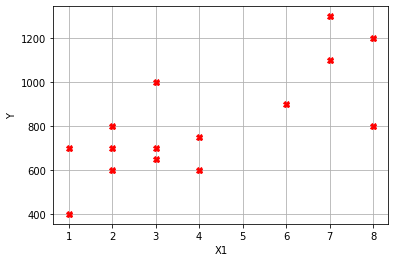

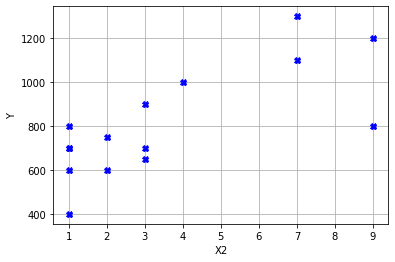

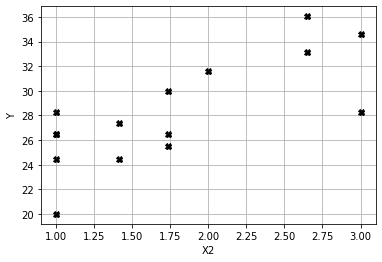

In [50]:
# fig = plt.figure()
plt.plot(task2_data.X1, task2_data.Y, 'rX', label = 'X1, Y')
plt.xlabel('X1')
plt.ylabel('Y')
plt.grid(True)
# plt.legend()
plt.savefig('./pictures/task2_dep1.pdf', dpi=300)
plt.show()

plt.plot(task2_data.X2, task2_data.Y, 'bX', label = 'X2, Y')
# plt.show()
plt.xlabel('X2')
plt.ylabel('Y')
plt.grid(True)
# plt.legend()
plt.savefig('./pictures/task2_dep2.pdf', dpi=300)
plt.show()
plt.plot(np.sqrt(task2_data.X2), np.sqrt(task2_data.Y), 'kX', label = 'X2, Y')
# plt.show()
plt.xlabel('X2')
plt.ylabel('Y')
plt.grid(True)
plt.show()

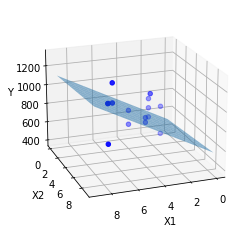

In [51]:
# create the figure
fig = plt.figure()

# add axes
ax = fig.add_subplot(111,projection='3d')

xx, yy = np.meshgrid(range(10), range(10))
z = 495.55617147 + 68.65299335*xx + 8.17627494*yy

# plot the plane
ax.plot_surface(xx, yy, z, alpha=0.5, label='Побудована оцінка поверхні регресії')

# ax = plt.axes(projection='3d')
ax.scatter3D(task2_data['X1'].to_numpy(), task2_data['X2'].to_numpy(), task2_data['Y'].to_numpy(), c="b", label = 'Значення відкликів')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.view_init(elev=20, azim = 70)
# plt.legend()
plt.show()
# fig.savefig('./pictures/task2_fin.png', dpi=300)

In [52]:
gamma_rel_2 = beta_2_estim[2, 0] / (np.sqrt(sigma_2 * A_2_inv[2, 2]))
gamma_rel_2

0.8595893343231885

In [53]:
x1_2 = 5
x2_2 = 5
x_vec_2 = np.array([[1],[5],[5]])
t_2 =2.179
left_mean_2 = regres_t2(x1_2, x2_2) - t_2*np.sqrt(sigma_2 * (x_vec_2.transpose() @ A_2_inv @ x_vec_2)[0,0])
right_mean_2 = regres_t2(x1_2, x2_2) + t_2*np.sqrt(sigma_2 * (x_vec_2.transpose() @ A_2_inv @ x_vec_2)[0,0])
(round(left_mean_2,5), round(right_mean_2,5))

(785.03483, 1003.97546)

In [54]:
left_val_2 = regres_t2(x1_2, x2_2) - t_2*np.sqrt(sigma_2 * (1 + x_vec_2.transpose() @ A_2_inv @ x_vec_2)[0,0])
right_val_2 = regres_t2(x1_2, x2_2) + t_2*np.sqrt(sigma_2 * (1 + x_vec_2.transpose() @ A_2_inv @ x_vec_2)[0,0])
(round(left_val_2, 5), round(right_val_2,5))


(502.35229, 1286.65799)

In [71]:
F_3 = np.vstack([np.ones(15),
#                  task2_data['X1'].to_numpy(),
                 task2_data['X2'].to_numpy(), 
                 task2_data['X1'].to_numpy()**2,
#                  task2_data['X2'].to_numpy()**2,
                 (task2_data['X2'].to_numpy()*task2_data['X1'].to_numpy())
#                 (task2_data['X2'].to_numpy()*task2_data['X1'].to_numpy())**2
                ]).transpose()
F_3

array([[ 1.,  1.,  4.,  2.],
       [ 1.,  1.,  4.,  2.],
       [ 1.,  1.,  4.,  2.],
       [ 1.,  7., 49., 49.],
       [ 1.,  7., 49., 49.],
       [ 1.,  3.,  9.,  9.],
       [ 1.,  3.,  9.,  9.],
       [ 1.,  2., 16.,  8.],
       [ 1.,  2., 16.,  8.],
       [ 1.,  4.,  9., 12.],
       [ 1.,  9., 64., 72.],
       [ 1.,  9., 64., 72.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  3., 36., 18.]])

In [56]:
def check_adeq(F, mu_vals):
    A = F.transpose() @ F
    A_inv = np.linalg.inv(A)
    beta_estim = A_inv @ F.transpose() @ mu_vals
    print(beta_estim)
    n = F_3.shape[0]
    m = F_3.shape[1]
    sigma = (1/(n-m)) * np.linalg.norm(mu_vals - F @ beta_estim)**2
    D = (n/(n-1))*mu_vals.var()
    gamma_adeq = D / sigma 
    return gamma_adeq

In [72]:
check_adeq(F_3, mu_2_vals)

[[459.71385352]
 [138.27661831]
 [  9.86915649]
 [-17.41660069]]


2.05398036690709

In [58]:
for i in F_3.T:
    for j in i:
        print(j, " & ", end = ' ')
    print('\\\\')

1.0  &  1.0  &  1.0  &  1.0  &  1.0  &  1.0  &  1.0  &  1.0  &  1.0  &  1.0  &  1.0  &  1.0  &  1.0  &  1.0  &  1.0  &  \\
1.0  &  1.0  &  1.0  &  7.0  &  7.0  &  3.0  &  3.0  &  2.0  &  2.0  &  4.0  &  9.0  &  9.0  &  1.0  &  1.0  &  3.0  &  \\
4.0  &  4.0  &  4.0  &  49.0  &  49.0  &  9.0  &  9.0  &  16.0  &  16.0  &  9.0  &  64.0  &  64.0  &  1.0  &  1.0  &  36.0  &  \\
2.0  &  2.0  &  2.0  &  49.0  &  49.0  &  9.0  &  9.0  &  8.0  &  8.0  &  12.0  &  72.0  &  72.0  &  1.0  &  1.0  &  18.0  &  \\


In [59]:
 A_3 = F_3.transpose() @ F_3
    
for i in A_3:
    for j in i:
        print(int(j), " & ", end = ' ')
    print('\\\\')

15  &  54  &  335  &  314  &  \\
54  &  316  &  2114  &  2178  &  \\
335  &  2114  &  15095  &  15218  &  \\
314  &  2178  &  15218  &  15942  &  \\


In [60]:
A_3_inv = np.linalg.inv(A_3)

In [61]:
for i in A_3_inv.T:
    for j in i:
        print(round(j,5), " & ", end = ' ')
    print('\\\\')

0.57855  &  -0.3172  &  -0.01641  &  0.04761  &  \\
-0.3172  &  0.23528  &  0.00523  &  -0.03089  &  \\
-0.01641  &  0.00523  &  0.00246  &  -0.00274  &  \\
0.04761  &  -0.03089  &  -0.00274  &  0.00596  &  \\


In [62]:
import seaborn as sns

In [63]:
task2_data

,X1,X2,Y
0,2,1,600
1,2,1,800
2,2,1,700
3,7,7,1300
4,7,7,1100
5,3,3,700
6,3,3,650
7,4,2,600
8,4,2,750
9,3,4,1000


In [ ]:
task2_data = task2_data.drop(columns=["X1","X2"])

In [ ]:
task2_data["x1^2"] = task2_data["X1"]**2
task2_data["x2^2"] = task2_data["X2"]**2
task2_data["x1*x2"] = (task2_data["X1"]*task2_data["X2"])

# task2_data["x1/x2"] = task2_data["X1"]/task2_data["X2"]
# task2_data["x2/x1"] = task2_data["X2"]/task2_data["X1"]
# task2_data["sin x1"] = np.cos(task2_data["X1"])

In [ ]:

# task2_data["sin x1"] = np.cos(task2_data["X1"])

In [ ]:
task2_data.corr()

In [ ]:
sns.heatmap(task2_data.corr())

In [ ]:
# plt.plot(task2_data.X1**2, task2_data.Y, 'rX', label = 'X1^2, Y')
# plt.show()
# plt.plot(task2_data.X2**2, task2_data.Y, 'bX', label = 'X2^2, Y')
# plt.show()
# plt.plot(task2_data.X2*task2_data.X1, task2_data.Y, 'kX', label = 'X1*X2, Y')
# plt.show()
plt.plot(task2_data.X2*task2_data.X1, task2_data.Y, 'kX', label = 'X1*X2, Y')
# plt.show()
# plt.plot(task2_data.X2*task2_data.X1, np.exp(task2_data.Y), 'kX', label = 'X1*X2, Y')
# plt.plot(task1_data, 'b')
plt.xlabel('значення факторів')
plt.ylabel('значення відкликів')
plt.grid(True)
# plt.legend()

## Track 3

In [ ]:
# видалено дублікати та взято середні значення відкликів
task2_data_2 = pd.DataFrame({'X1': [2, 7, 3, 4, 3, 8,1,6],
                           'X2': [1,7,3,2,4, 9,1,3],
                           'Y': [700,1200,675, 675, 1000,1000,550,900]})
task2_data_2

In [ ]:
# fig = plt.figure()
plt.plot(task2_data_2.X1, task2_data_2.Y, 'rX', label = 'X1, Y')
plt.xlabel('X1')
plt.ylabel('Y')
plt.grid(True)
# plt.legend()
plt.savefig('./pictures/task2_dep1_2.pdf', dpi=300)
plt.show()

plt.plot(task2_data_2.X2, task2_data_2.Y, 'bX', label = 'X2, Y')
# plt.show()
plt.xlabel('X2')
plt.ylabel('Y')
plt.grid(True)
# plt.legend()
plt.savefig('./pictures/task2_dep2_2.pdf', dpi=300)
plt.show()

In [ ]:
task2_data_2.corr()

In [ ]:
sns.heatmap(task2_data_2.corr())

In [ ]:
task2_data_2["x1^2"] = task2_data_2["X1"]**2
task2_data_2["x2^2"] = task2_data_2["X2"]**2
task2_data_2["x1*x2"] = (task2_data_2["X1"]*task2_data_2["X2"])

In [ ]:
task2_data_2.corr()

In [ ]:
sns.heatmap(task2_data_2.corr())

In [ ]:
mu_4_vals = task2_data_2['Y'].to_numpy()
mu_4_vals.shape = (8, 1)
mu_4_vals

In [ ]:
task2_data_2.shape

In [ ]:
F_4 = np.vstack([np.ones(8),
                 task2_data_2['X1'].to_numpy(),
                 task2_data_2['X2'].to_numpy()
#                  task2_data_2['X1'].to_numpy()**2,
#                  task2_data_2['X2'].to_numpy()**2,
#                  (task2_data_2['X2'].to_numpy()*task2_data_2['X1'].to_numpy()),
#                  np.log(task2_data_2['X2'].to_numpy()*task2_data_2['X1'].to_numpy())
                ]).transpose()
F_4

In [ ]:
A4 = F_4.transpose() @ F_4
A4_inv = np.linalg.inv(A4)
for i in A4_inv.T:
    for j in i:
        print(round(j, 5), " & ", end = ' ')
    print('\\\\')

In [ ]:
def check_adeq(F, mu_vals):
    A = F.transpose() @ F
    A_inv = np.linalg.inv(A)
    beta_estim = A_inv @ F.transpose() @ mu_vals
    n = F_3.shape[0]
    m = F_3.shape[1]
    sigma = (1/(n-m)) * np.linalg.norm(mu_vals - F @ beta_estim)**2
    D = (n/(n-1))*mu_vals.var()
    gamma_adeq = D / sigma 
    return gamma_adeq, beta_estim, sigma

In [ ]:
check_adeq(F_4, mu_4_vals)

In [ ]:
4.8759

In [ ]:
task2_data_2

In [ ]:
F_5 = np.vstack([np.ones(8),
#                  task2_data_2['X1'].to_numpy(),
                 task2_data_2['X2'].to_numpy(),
                 task2_data_2['X1'].to_numpy()**2,
#                  task2_data_2['X2'].to_numpy()**2,
                 (task2_data_2['X2'].to_numpy()*task2_data_2['X1'].to_numpy())
#                  np.log(task2_data_2['X2'].to_numpy()*task2_data_2['X1'].to_numpy())
                ]).transpose()
F_5

In [ ]:
check_adeq(F_5, mu_4_vals)

In [ ]:
A5 = F_5.transpose() @ F_5
A5_inv = np.linalg.inv(A5)
for i in A5_inv.T:
    for j in i:
        print(round(j,5), " & ", end = ' ')
    print('\\\\')

In [ ]:
6.0942

In [ ]:
# fig = plt.figure()
plt.plot(task2_data.X1**2, task2_data.Y, 'rX', label = 'X1, Y')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
# plt.legend()
plt.savefig('./pictures/task2_dep3.pdf', dpi=300)
plt.show()

plt.plot(task2_data.X2*task2_data.X1 , task2_data.Y, 'bX', label = 'X2, Y')
# plt.show()
plt.xlabel('X2')
plt.ylabel('Y')
plt.grid(True)
# plt.legend()
plt.savefig('./pictures/task2_dep4.pdf', dpi=300)
plt.show()
plt.plot(np.sqrt(task2_data.X2), np.sqrt(task2_data.Y), 'kX', label = 'X2, Y')
# plt.show()
plt.xlabel('X2')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(task2_data_2['X1'].to_numpy(), task2_data_2['X2'].to_numpy(), task2_data_2['Y'].to_numpy(), c="b")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.view_init(elev=30, azim = 10)
# ax.set_xticks([0, 2, 4, 6, 8, 10])
# ax.set_yticks([-10, -5, 0, 5, 10])
# ax.set_zticks([-4, -2, 0, 2, 4, 6, 8, 10])
plt.show()
fig.savefig('./pictures/task2_data_2.png', dpi=300)

In [ ]:
beta_5_estim = check_adeq(F_5, mu_4_vals)[1]
sigma_5 = check_adeq(F_5, mu_4_vals)[2]
beta_5_estim

In [ ]:
beta_5_estim[1, 0]

In [ ]:
A5_inv[1, 1]

In [ ]:
gamma_rel_5 = beta_5_estim[1, 0] / (np.sqrt(sigma_5 * A5_inv[1, 1]))
gamma_rel_5

In [ ]:
regres_t5 =  lambda x1, x2: beta_5_estim[0, 0] + beta_5_estim[1, 0] * x2 + beta_5_estim[2, 0] * x1**2 + beta_5_estim[3, 0] * x1*x2

In [ ]:
regres_t5(5,4)

In [ ]:
x1_5 = 1
x2_5 = 1
x_vec_5 = np.array([[1],[x1_5],[x2_5**2],[x1_5*x2_5]])
t_5 = 2.776
left_mean_5 = regres_t5(x1_5, x2_5) - t_5*np.sqrt(sigma_5 * (x_vec_5.transpose() @ A5_inv @ x_vec_5)[0,0])
right_mean_5 = regres_t5(x1_5, x2_5) + t_5*np.sqrt(sigma_5 * (x_vec_5.transpose() @ A5_inv @ x_vec_5)[0,0])
(round(left_mean_5,5), round(right_mean_5,5))

In [ ]:
left_val_5 = regres_t5(x1_5, x2_5) - t_5*np.sqrt(sigma_5 * (1 + x_vec_5.transpose() @ A5_inv @ x_vec_5)[0,0])
right_val_5 = regres_t5(x1_5, x2_5) + t_5*np.sqrt(sigma_5 * (1 + x_vec_5.transpose() @ A5_inv @ x_vec_5)[0,0])
(round(left_val_5, 5), round(right_val_5,5))

In [ ]:
task2_data = pd.DataFrame({'X1': [2, 2, 2, 7, 7, 3, 3, 4, 4, 3, 8,8,1,1,6],
                           'X2': [1,1,1,7,7,3,3,2,2,4,9,9,1,1,3],
                           'Y': [600,800,700,1300,1100,700,650,600,750,1000,800,1200,700,400,900]})
task2_data